In [27]:
!pip install -r requirements.txt

In [23]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

In [3]:
# setting working directory

work_dir = 'D:\Lab\Jordan lab\outreach\QMBE_2023\materials\VTK_2023_behavior_classification'

In [2]:
# import packages

import glob
import itertools
import umap
import hdbscan
import numpy as np
import pandas as pd

from lstm_train import train
from sklearn.preprocessing import StandardScaler
from visualization import hdbscan_figure, umap_figure, LSTM_hdbscan_figure, LSTM_umap_figure

In [4]:
# Setting keypoints

keypoint_names = ['mouth', 'head', 'dorsal_front', 'dorsal_center', 'dorsal_back', 'caudal_fin']

key_characters = [f'distance_{keypoint_names[1]}-{keypoint_names[1]}',
                  f'alignment_{keypoint_names[1]}-{keypoint_names[0]}',
                  f'alignment_{keypoint_names[4]}-{keypoint_names[3]}',
                  f'angles_{keypoint_names[1]}-{keypoint_names[0]} to {keypoint_names[1]}',
                  f'angles_{keypoint_names[4]}-{keypoint_names[3]} to {keypoint_names[1]}',
                  f'angles_{keypoint_names[1]}-{keypoint_names[0]} to {keypoint_names[4]}',
                  f'angles_{keypoint_names[4]}-{keypoint_names[3]} to {keypoint_names[4]}']

key_characters

['distance_head-head',
 'alignment_head-mouth',
 'alignment_dorsal_back-dorsal_center',
 'angles_head-mouth to head',
 'angles_dorsal_back-dorsal_center to head',
 'angles_head-mouth to dorsal_back',
 'angles_dorsal_back-dorsal_center to dorsal_back']

In [5]:
# import sampled frames with key characters
## key characters were already calculated from raw tracking data
sampled_df = pd.read_csv(work_dir + '/data/sampled_umap_cluster.csv')

## extract train_data with UMAP-HDBSCAN clustering ids (umap_neighbor == 15)

train_data = sampled_df[key_characters].to_numpy()
train_label = sampled_df['cluster_un15'].to_numpy()

## standardize the train data

scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

In [6]:
# create umap model

umap_train = umap.UMAP(n_neighbors=15, random_state=0).fit(train_data)
train_data = umap_train.embedding_

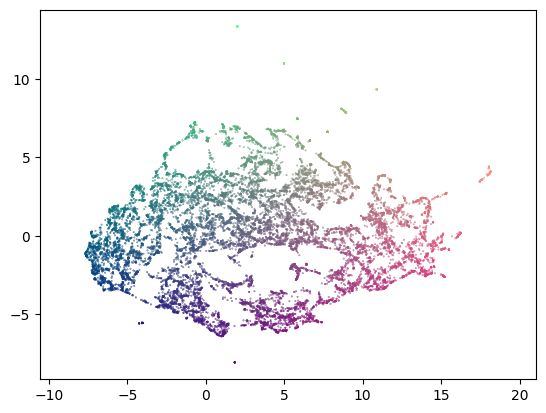

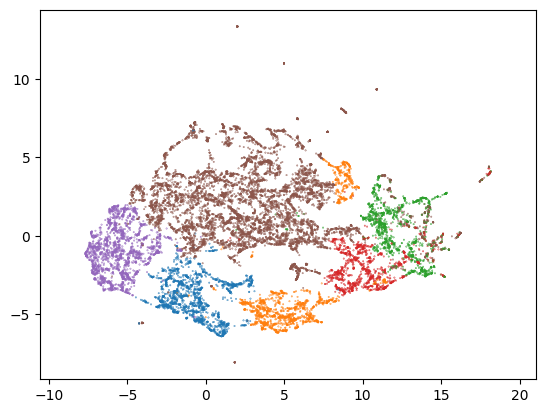

In [7]:
# visualize umap embedding of key characters of frames with HDBSCAN clustering resutls
## HDBSCAN clustering is only for visualization, not used for further steps

## UMAP embedding without clustering results
umap_figure(train_data)

## UMAP embedding with HDBSCAN clustering results
hdbscan_figure(train_data, train_label)

In [ ]:
## examples of pose clusters


In [14]:
# import time stamps for pre-classified behaviors
## example_motion_class.csv includes time stamps of lateral display and bite behavior

time_stamp_df = pd.read_csv(work_dir + '/data/example_motion_class.csv')

trial_path = os.path.join(work_dir+'/data/multi_*.csv')
trial_ls = glob.glob(os.path.normpath(trial_path))

In [15]:
time_stamp_df[:10]

,file,part,class,start_sec,end_sec,start,end
0,multi_contest_trial3_boxE_20Oct22,1,bite,182,186,21836,22050
1,multi_contest_trial3_boxE_20Oct22,1,bite,182,186,22060,22200
2,multi_contest_trial3_boxE_20Oct22,1,bite,182,186,22308,22370
3,multi_contest_trial3_boxE_20Oct22,1,bite,182,186,22395,22447
4,multi_contest_trial3_boxE_20Oct22,1,lateral,187,190,22447,22770
5,multi_contest_trial1_boxE_20Oct22,2,lateral,68,70,8199,8518
6,multi_contest_trial5_boxE_20Oct22,1,bite,130,131,15794,15887
7,multi_contest_trial5_boxE_20Oct22,1,lateral,131,135,15893,16142
8,multi_contest_trial3_boxF_20Oct22,2,lateral,455,456,54626,54780
9,multi_contest_trial2_boxF_22Oct22,2,lateral,187,192,22469,23037


In [9]:
trial_df_sample = pd.read_csv(trial_ls[0])[:10]

trial_df_sample

,time_stamp,distance_head-head,alignment_head-mouth,alignment_dorsal_back-dorsal_center,angles_head-mouth to head,angles_dorsal_back-dorsal_center to head,angles_head-mouth to dorsal_back,angles_dorsal_back-dorsal_center to dorsal_back
0,53498.0,188.180977,0.959054,0.922285,2.886690,2.825427,2.916747,2.869717
1,53499.0,188.110547,0.955157,0.920447,2.879457,2.818180,2.908057,2.862006
2,53500.0,188.040118,0.951261,0.918609,2.872224,2.810934,2.899367,2.854294
3,53501.0,187.969689,0.947364,0.916770,2.864990,2.803687,2.890677,2.846583
4,53502.0,187.899260,0.943468,0.914932,2.857757,2.796440,2.881986,2.838871
5,53503.0,187.828831,0.939571,0.913094,2.850524,2.789193,2.873296,2.831160
6,53504.0,187.758401,0.935675,0.911256,2.843290,2.781947,2.864606,2.823448
7,53505.0,187.687972,0.931778,0.909418,2.836057,2.774700,2.855916,2.815737
8,53506.0,187.617543,0.927881,0.907580,2.828824,2.767453,2.847226,2.808025
9,53507.0,187.547114,0.923985,0.905742,2.821590,2.760206,2.838536,2.800314


In [16]:
# create input data for training LSTM autoencoder

pd.options.mode.chained_assignment = None

max_seq_len = 0
raw_behav_seq = []
true_labels = []
for trial in trial_ls:
    ## import feature and time_stamp dataframes
    trial_df = pd.read_csv(trial)
    trial_name = trial.split('\\')[-1][:-12]
    print(trial_name)
    
    file_time_stamp = time_stamp_df[time_stamp_df['file']==trial_name]
    
    trial_df_labeled = pd.DataFrame()
    for index, row in file_time_stamp.iterrows():
        
        ## calculate start & end frames of each behavior
        ### raw videos were divided into three files due to the camera setting
        ### each file has 63660 frames
        part = int(row['part'])-1 
        bout_start = row['start'] + (part*63660) 
        bout_end = row['end'] + (part*63660) 
        
        ## save true labels
        bout_class = row['class']
        true_labels.append(bout_class)
        
        ## transform key characters of each behaviors into umap embedding
        bout_df = trial_df[(trial_df['time_stamp'] >= bout_start) & (trial_df['time_stamp'] <= bout_end)]
        bout_feature = bout_df[key_characters].to_numpy()
        bout_feature = scaler.transform(bout_feature)
        bout_umap = umap_train.transform(bout_feature)
        
        ## upadate max_seq_len for zero-padding
        if bout_umap.shape[0] > max_seq_len:
            max_seq_len = bout_umap.shape[0]
        
        raw_behav_seq.append(bout_umap)

multi_contest_trial1_boxE_20Oct22
multi_contest_trial2_boxE_23Oct22
multi_contest_trial3_boxE_20Oct22
multi_contest_trial5_boxE_20Oct22
multi_contest_trial5_boxF_06Nov22


In [17]:
## zero-padding to max_seq_len

input_seq = []
for indiv_seq in raw_behav_seq:
    indiv_seq = np.array(indiv_seq)
    pad_width_0 = (max_seq_len-indiv_seq.shape[0])//2
    pad_width_1 = (max_seq_len-indiv_seq.shape[0]) - pad_width_0
    indiv_seq_pad = np.pad(indiv_seq, ((pad_width_0, pad_width_1),(0, 0)))
    input_seq.append(indiv_seq_pad)
    
input_seq = np.array(input_seq)

input_seq.shape

(15, 324, 2)

In [18]:
# train LSTM autoencoder
## setting parameters

LEARNING_RATE = 0.0005
BATCH_SIZE = 16
EPOCHS = 50

In [19]:
## train LSTM autoencoder
Autoencoder, Encoder, Decoder = train(input_seq, LEARNING_RATE, BATCH_SIZE, EPOCHS)

## get latent_representation of input sequences
latent_representation = Encoder.predict(input_seq)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 324, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               41200     
                                                                 
 repeat_vector (RepeatVector  (None, 324, 100)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 324, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 324, 2)           202       
 ibuted)                                                         
                                                                 
Total params: 121,802
Trainable params: 121,802
Non-trai

Results with umap_neighbor = 5


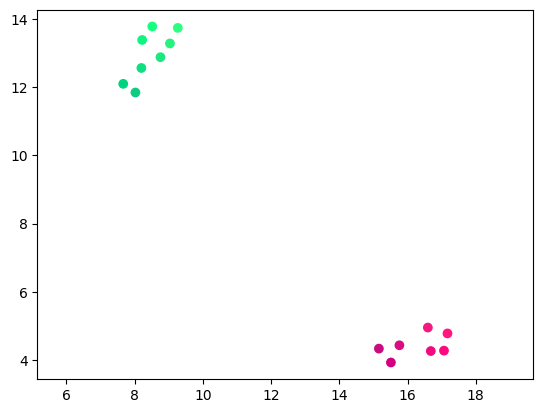

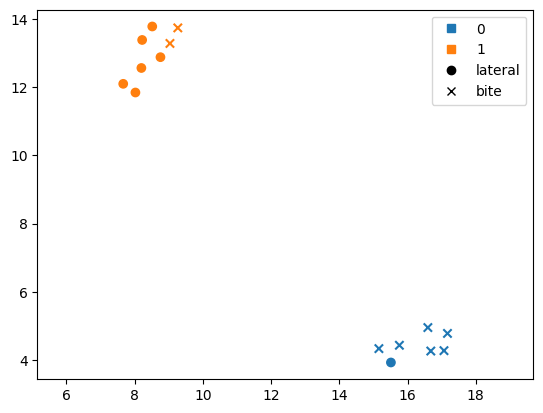

Results with umap_neighbor = 10


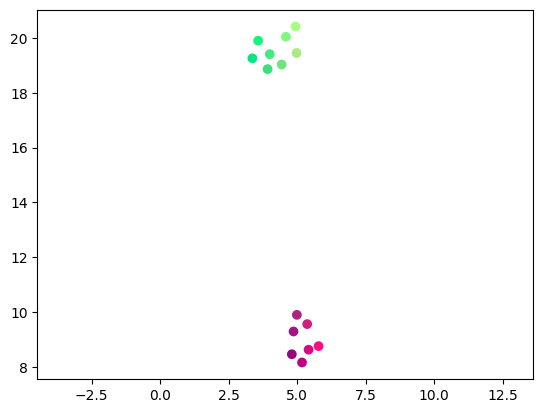

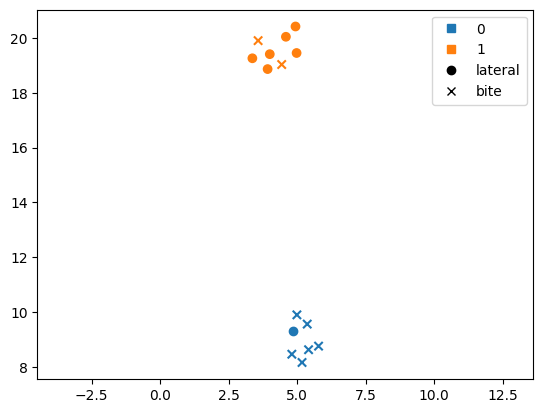

In [20]:
# HDBSCAN clustering of latent representations

umap_neighbor = [5, 10]
for neighbor in umap_neighbor:
    print(f"Results with umap_neighbor = {neighbor}")
    ## UMAP with latent representation
    reducer = umap.UMAP(random_state=0, n_neighbors=neighbor).fit(latent_representation)
    second_embedding = reducer.transform(latent_representation)
    ### visualize umap embedding of LSTM latent representation
    LSTM_umap_figure(second_embedding)
    
    ## HDBSCAN clustering
    clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
    clusterer.fit(second_embedding)
    cluster_labels = clusterer.labels_
    ### visualize HDBSCAN clustering
    LSTM_hdbscan_figure(second_embedding, cluster_labels, true_labels)

In [ ]:
# The results can be improved by 
# adding more key characters, changing hyperparamters for UMAP, HDBSCAN, or LSTM autoencoder, etc.